<a href="https://colab.research.google.com/github/suyashApatil/YesBankStockPrice/blob/main/Copy_of_Yes_Bank_Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YES BANK STOCK CLOSING PRICE PREDICTION**

## **Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**

In [2]:
#Importing libraries for data handelling
import pandas as pd
import numpy as np
from numpy import math

#Importing libraries for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Machine Learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
stockprice_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/YesBankStockPrice/data_YesBank_StockPrices.csv')

In [19]:
stockprice_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [6]:
stockprice_df.shape

(185, 5)

In [20]:
ybsp_df = stockprice_df.copy()

In [21]:
ybsp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [22]:
#importing datetime
from datetime import datetime
#parsing date which is string of format %b-%y to datetime (%b is for Jul i.e month short form and %y is for year in two digit)
ybsp_df['Date'] = ybsp_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [23]:
ybsp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [24]:
ybsp_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [25]:
duplicate = ybsp_df[stockprice_df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Date, Open, High, Low, Close]
Index: []


## **Exploratory Data Analysis**

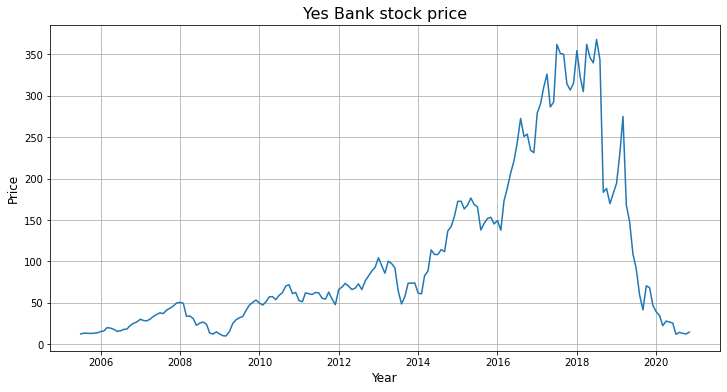

In [26]:
#plotting close price vs date
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.plot(ybsp_df['Date'], ybsp_df['Close'])
plt.title('Yes Bank stock price', fontsize=16)
plt.show()

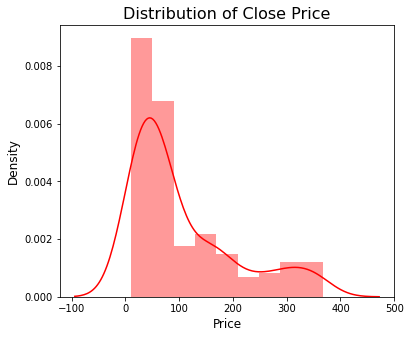

In [41]:
#distribution plot of Close price to look for normal distribution
plt.figure(figsize=(6,5))
sns.distplot(ybsp_df['Close'],color='red')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

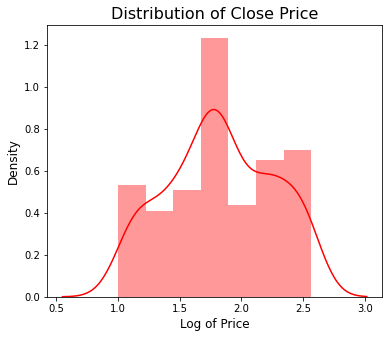

In [42]:
#distribution plot of Close price by applying log transformation
plt.figure(figsize=(6,5))
sns.distplot(np.log10(ybsp_df['Close']),color='red')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Log of Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

In [43]:
#make a list of independant numerical variables
numerical_features = list(set(ybsp_df.describe().columns) - {'Close'})
numerical_features

['High', 'Open', 'Low']

<function matplotlib.pyplot.show>

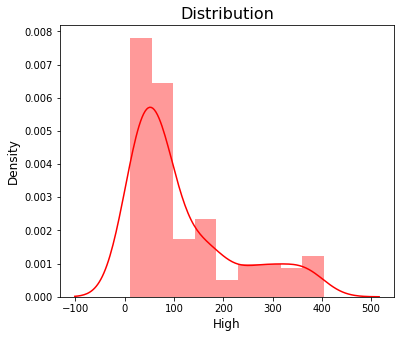

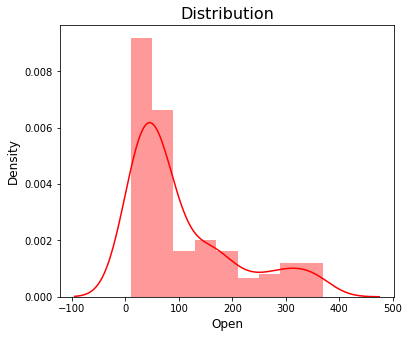

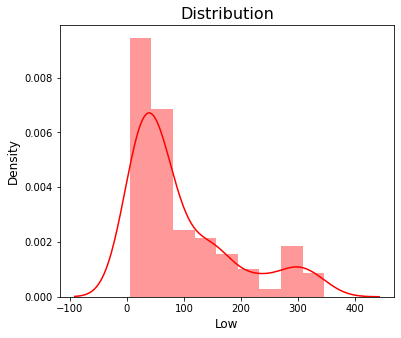

In [44]:
#Plotting distribution for each of numerical features.
for col in numerical_features:
    plt.figure(figsize=(6,5))
    sns.distplot(ybsp_df[col], color='red')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show